# profit estimation of companies with linear regression

In [16]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### loading the dataset

In [17]:
companies = pd.read_csv('1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### extracting independent and dependent variables

In [18]:
X = companies.iloc[:,:-1].values
y = companies.iloc[:,4].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

### visualizing the data before processing

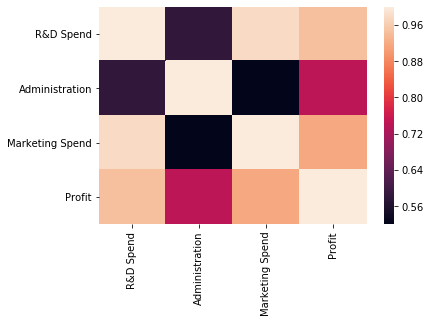

In [19]:
sns.heatmap(companies.corr())


### encoding categorical data

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### avoiding dummy data trap

In [12]:
#X = X[:,1:]
#X

array([[471784.1, 'New York'],
       [443898.53, 'California'],
       [407934.54, 'Florida'],
       ...,
       [227142.82, 'California'],
       [281692.32, 'California'],
       [295442.17, 'New York']], dtype=object)

### splitting dataset into train and test

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


### fitting model to training set

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### predicting the test dataset

In [24]:
y_pred = lin_reg.predict(X_test)
y_pred

array([ 89602.23052112,  88239.80201614,  94702.12002985, 175509.7444267 ,
        83461.77749735, 110599.74053966, 131948.85577937,  91283.61641449,
       164580.71663692,  53151.83628339,  66780.48203841, 150415.85279943,
       126696.46745134,  59174.37574827, 177253.79545622,  75372.94806241,
       118123.9832721 , 164324.87239863, 172648.99037   , 182038.49259395,
       121264.52583037,  85484.93573297, 180817.12779825,  83961.3136763 ,
       104805.01158595, 101035.8261546 ,  55003.82567287,  56953.15534907,
        68725.09361289, 210505.51620949, 120652.49268841, 111518.5513944 ,
       101523.1718271 , 137818.74835243,  63802.68839172, 108653.93623664,
       185980.87518202, 171274.98401878, 174473.99007598, 117547.80200509,
        96770.53433932, 165202.00538581, 107521.29431353,  50126.02756979,
       116391.15260094,  58469.58267852, 158259.46233248,  78449.79206776,
       159569.58862317, 131003.17642491, 184702.06381636, 174438.83622507,
        93554.04471704,  

### finding coefficients and intercepts

In [14]:
# coefficient 
print(lin_reg.coef_)

[-7.92323210e+02 -4.64382238e+02  5.24699015e-01  9.03445439e-01
  1.03284926e-01]


In [15]:
# intercepts
print(lin_reg.intercept_)

-57418.75678547408


### evaluating the model

In [16]:
# calculating the  R squared error
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9209536193310021